# Import 

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import h5py
import tables
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Global variables 

In [2]:
SummerSchool_PATH='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/'

In [3]:
study_1='study_1'
study_2='study_2'

In [13]:
HASE_PATH='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/hase/'

# Data QC 

In [4]:
df_cov_study_2=pd.read_csv('{}/{}/covariates/study_2.txt'.format(SummerSchool_PATH,study_2),sep='\t')
print df_cov_study_2.shape
df_cov_study_2.head()

(1200, 4)


,id,sex,age,height
0,study_2_0,1,45.464192,156.185172
1,study_2_1,1,56.709294,137.955759
2,study_2_2,1,48.622447,229.814742
3,study_2_3,1,58.660750,139.418125
4,study_2_4,1,52.370209,182.369976


In [5]:
df_cov_study_2.describe()

,sex,age,height
count,1200.000000,1200.000000,1200.000000
mean,0.536667,49.980146,159.429317
std,0.498862,5.765133,20.162380
min,0.000000,40.003715,95.325739
25%,0.000000,45.104445,145.827254
50%,1.000000,49.794544,159.528628
75%,1.000000,55.011698,173.260660
max,1.000000,59.991642,229.814742


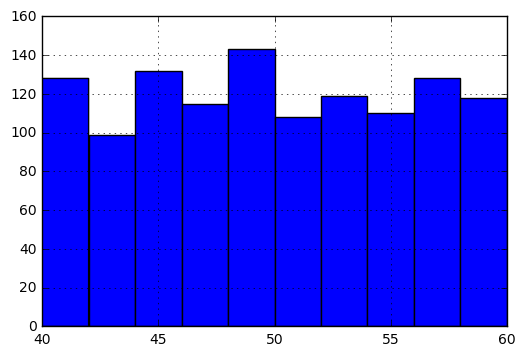

In [6]:
df_cov_study_2.age.hist();

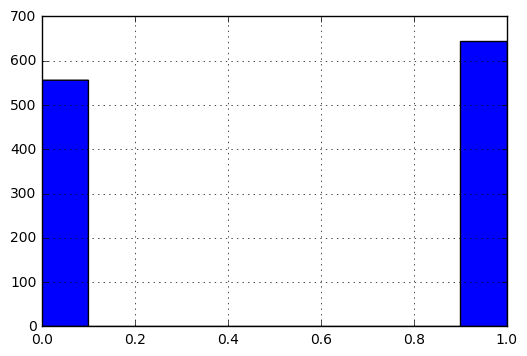

In [7]:
df_cov_study_2.sex.hist();

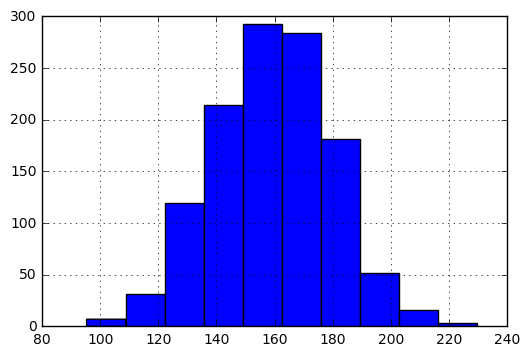

In [8]:
df_cov_study_2.height.hist();

# run HASE 

Sometime it is not possible to store all GWAS results for thousands phenotypes. HASE does not compute p-value on the fly to save computation time. Therefore threshold is based on t-statistics. By changing  variable **t_threshold** below you can check which threshold is more sutable for analysis. 

In [9]:
#Bonferroni correction in our case:
N_snps=50000
N_phenotypes=13260
print 'p-value threshold = {}'.format(0.05/N_snps/N_phenotypes)

p-value threshold = 7.54147812971e-11


In [10]:
#Define the t-statistics threshold for analysis
t_threshold=6.5
print 'p-value = {}'.format(stats.norm.sf(abs(t_threshold))*2 )

p-value = 8.03200116772e-11


In [15]:
%%sh -s "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3

python ${HASE_PATH}/hase.py -mode regression \
-g ${DATA_PATH}/${i}/${i}/ \
-study_name ${i} \
-o ${DATA_PATH}/${i}/results/ \
-ph ${DATA_PATH}/${i}//phenotype/ \
-cov ${DATA_PATH}/${i}/covariates/ \
-th 6.5

Namespace(cluster='n', covariates='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/covariates/', derivatives=None, effect_intercept=False, encoded=None, genotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/study_2/'], hdf5=True, id=False, interaction=None, intercept='y', maf=0.0, mapper=None, mapper_chunk=None, mode='regression', node=None, np=True, out='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/', pd_full=False, permute_ph=False, ph_id_exc=None, ph_id_inc=None, phenotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2//phenotype/'], protocol=None, ref_name='1000Gp1v3_ref', snp_id_exc=None, snp_id_inc=None, study_name=['study_2'], thr=6.5, vcf=False)
Numpy linked to openblas_info
START regression mode...
reading file study_2.txt
There are 1200 ids and 3 columns 
Reading ID from probes....
There are 1477 ids
There are 1200 common ids
Time to select SNPs 5.96046447754e-06s
5000 1477
(500

/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/hase/hdgwas/hdregression.py:121: RuntimeWarning: invalid value encountered in divide
  t_stat = np.sqrt(DF) * np.divide(A1_B_full[:, (N_con):N_con+1, :], a44_C_BTA1B)
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/hase/hdgwas/tools.py:170: RuntimeWarning: invalid value encountered in greater
  mask = np.where(np.abs(self.t_stat) > t_threshold)


# Create GWAS summary 

In [16]:
%%sh -s "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3

mkdir -p ${DATA_PATH}/${i}/summary/

python ${HASE_PATH}/tools/analyzer.py -r ${DATA_PATH}/${i}/results/ -o ${DATA_PATH}/${i}/summary/



Namespace(df=None, out='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/summary/', r='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/')
DF is not defined. Forced to use z_score statistics!
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/138result.npy
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/137result.npy
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/135result.npy
Saving data...
DF is not defined. Forced to use z_score statistics!
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/134result.npy
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/132result.npy
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/130result.npy
Saving data...
DF is not defined. Forced to use z_score statistics!
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/results/127result.

In [18]:
%%sh -s "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3

head ${DATA_PATH}/${i}/summary/results.csv


RSID p_value t-stat phenotype SE MAF BETA
7:42547167 3.15290131584e-11 -6.63924678543 phen_1869 23.9013506827 0.994737955729 -158.686965687
7:42568032 2.92648991422e-11 -6.65022314465 phen_1869 24.0490375141 0.994739583333 -159.931465883
7:42547167 5.9300676232e-11 -6.54548987451 phen_7629 22.6138068621 0.994737955729 -148.01844384
7:42568032 5.50772517659e-11 -6.55652185274 phen_7629 22.7535488142 0.994739583333 -149.184140028
7:42547167 7.11727903444e-11 -6.5181647651 phen_9799 22.064972668 0.994737955729 -143.823127388
7:42568032 6.15209069461e-11 -6.53999495906 phen_9799 22.2000624615 0.994739583333 -145.188296589
7:42547167 4.03152002347e-11 -6.60291452857 phen_8854 23.5498315985 0.994737955729 -155.497525207
7:42568032 3.72800723742e-11 -6.61450354555 phen_8854 23.6952759615 0.994739583333 -156.73248686
7:42547167 2.22524965321e-11 -6.6904239593 phen_4799 21.9343541121 0.994737955729 -146.750128283


In [19]:
df_summary=pd.read_csv('{}/{}/summary//results.csv'.format(SummerSchool_PATH,study_2),sep=' ')
print df_summary.shape
df_summary.head()

(1386, 7)


,RSID,p_value,t-stat,phenotype,SE,MAF,BETA
0,7:42547167,3.152901e-11,-6.639247,phen_1869,23.901351,0.994738,-158.686966
1,7:42568032,2.926490e-11,-6.650223,phen_1869,24.049038,0.994740,-159.931466
2,7:42547167,5.930068e-11,-6.545490,phen_7629,22.613807,0.994738,-148.018444
3,7:42568032,5.507725e-11,-6.556522,phen_7629,22.753549,0.994740,-149.184140
4,7:42547167,7.117279e-11,-6.518165,phen_9799,22.064973,0.994738,-143.823127


In [20]:
df_summary.query('MAF>0.05 and MAF<0.95')

,RSID,p_value,t-stat,phenotype,SE,MAF,BETA


# Mapper file

The files were already created. Let's check them:

In [21]:
flip=np.load('{}/{}/mapper/flip_1000Gp1v3_ref_{}.npy'.format(SummerSchool_PATH,study_2, study_2, study_2 ))
print 'Flip shape', flip.shape
print 'Number of flipped {}'.format(np.sum(flip==-1))
values=np.load('{}/{}/mapper/values_1000Gp1v3_ref_{}.npy'.format(SummerSchool_PATH,study_2, study_2, study_2 ))
print 'Values shape', values.shape
print 'Number of missed variants {}'.format(np.sum(values==-1))
print 'Number of present variants {}'.format(np.sum(values!=-1))
keys=np.load('{}/{}/mapper/keys_1000Gp1v3_ref.npy'.format(SummerSchool_PATH,study_2, study_2))
print 'Keys shape', keys.shape
#flip=None
#values=None
#keys=None

Flip shape (50000,)
Number of flipped 5461
Values shape (30072672,)
Number of missed variants 30022792
Number of present variants 49880
Keys shape (30072672,)


# Prepare Files for HD Meta-analysis

## Compute Partial Derivatives for Meta-Analysis

In [29]:
%%sh -s "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3


python ${HASE_PATH}/hase.py -mode single-meta \
-g ${DATA_PATH}/${i}/${i}/ \
-study_name ${i} \
-o ${DATA_PATH}/${i}/partDer/ \
-ph ${DATA_PATH}/${i}//phenotype/ \
-cov ${DATA_PATH}/${i}/covariates/ \
-mapper ${DATA_PATH}/${i}/mapper/ 



WARNING!!! You did not set threshold for t-value, all results will be saved
Namespace(cluster='n', covariates='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/covariates/', derivatives=None, effect_intercept=False, encoded=None, genotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/study_2/'], hdf5=True, id=False, interaction=None, intercept='y', maf=0.0, mapper='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/mapper/', mapper_chunk=None, mode='single-meta', node=None, np=True, out='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/partDer/', pd_full=False, permute_ph=False, ph_id_exc=None, ph_id_inc=None, phenotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2//phenotype/'], protocol=None, ref_name='1000Gp1v3_ref', snp_id_exc=None, snp_id_inc=None, study_name=['study_2'], thr=None, vcf=False)
Numpy linked to openblas_info
You loaded values for 1 studies and 30072672 test values
r

Closing remaining open files:/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_2/study_2/probes/study_2.h5...done


## Encode data for Meta-analysis

In [32]:
%%sh -s "$study_1" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3

python ${HASE_PATH}/hase.py -mode encoding \
-g ${DATA_PATH}/${i}/${i}/ \
-study_name ${i} \
-o ${DATA_PATH}/${i}/encode/ \
-mapper ${DATA_PATH}/${i}//mapper/ \
-ph ${DATA_PATH}/${i}//phenotype/


WARNING!!! You did not set threshold for t-value, all results will be saved
Namespace(cluster='n', covariates=None, derivatives=None, effect_intercept=False, encoded=None, genotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1/study_1/'], hdf5=True, id=False, interaction=None, intercept='y', maf=0.0, mapper='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1//mapper/', mapper_chunk=None, mode='encoding', node=None, np=True, out='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1/encode/', pd_full=False, permute_ph=False, ph_id_exc=None, ph_id_inc=None, phenotype=['/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1//phenotype/'], protocol=None, ref_name='1000Gp1v3_ref', snp_id_exc=None, snp_id_inc=None, study_name=['study_1'], thr=None, vcf=False)
Creating output folder /scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1/encode/
Numpy linked to openblas_info
You loaded values for 1 studies and 300

Closing remaining open files:/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//study_1/study_1/probes/study_1.h5...done
